<a href="https://colab.research.google.com/github/EfekanMutlu/Classifications_with_Pytorch/blob/main/One_Label_Multi_Class/Stellar_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Multi-Classification Example with Pytorch: Galaxy, Star & Quasar Classification**

by *Efekan Mutlu*

In this project, I have prepared a one-label multi-class example on a stellar dataset using Pytorch. First, I will visualize and analyze the data, then I will perform data preprocessing operations for train and test, and then I will define and test the model using a typical linear NN module. Finally, I will test the efficiency of the model.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics

In [ ]:
file="star_classification.csv"
data=pd.read_csv(file)
data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


The columns do not contain any null values and are ready for the model. You can examine the various statistical information of the columns from the table above. The characteristics of the columns are as follows:
1. **obj_ID** = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2. **alpha** = Right Ascension angle (at J2000 epoch)
3. **delta** = Declination angle (at J2000 epoch)
4. **u** = Ultraviolet filter in the photometric system
5. **g** = Green filter in the photometric system
6. **r** = Red filter in the photometric system
7. **i** = Near Infrared filter in the photometric system
8. **z** = Infrared filter in the photometric system
9. **run_ID** = Run Number used to identify the specific scan
10. **rereun_ID** = Rerun Number to specify how the image was processed
11. **cam_col** = Camera column to identify the scanline within the run
12. **field_ID** = Field number to identify each field
13. **spec_obj_ID** = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
14. **class** = object class (galaxy, star or quasar object)
15. **redshift** = redshift value based on the increase in wavelength
16. **plate** = plate ID, identifies each plate in SDSS
17. **MJD** = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
18. **fiber_ID** = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

We have 3 different classes: *Galaxy, star* and *quasar*. We can use a pie chart to see their occurrence ratios in the dataset.

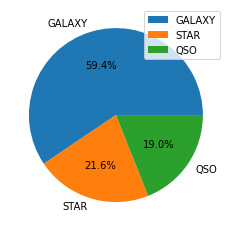

In [ ]:
plt.pie(data['class'].value_counts(),autopct="%1.1f%%",labels=['GALAXY','STAR','QSO'])
plt.legend()

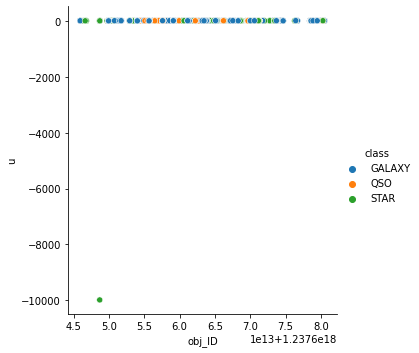

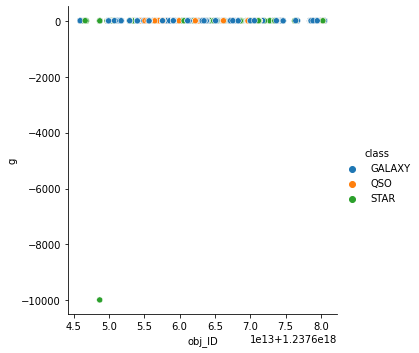

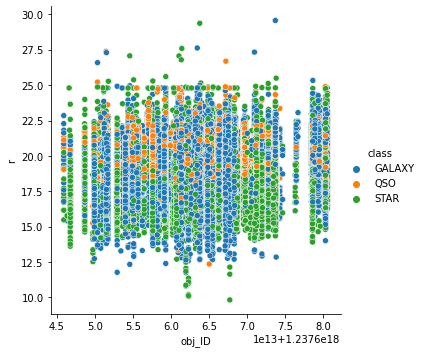

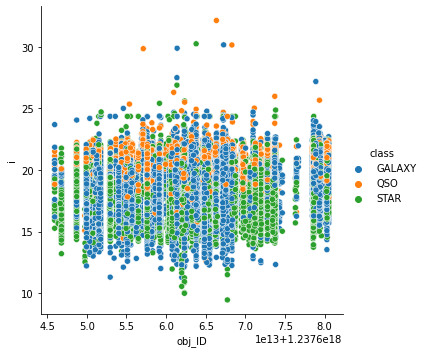

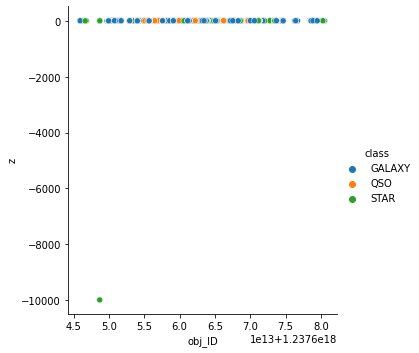

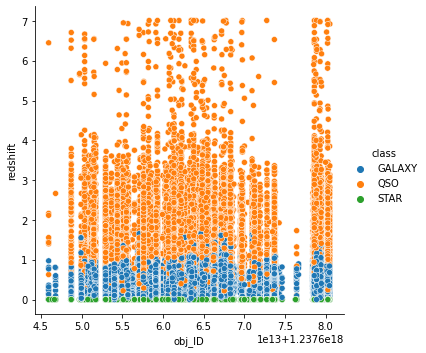

In [ ]:
f1=sns.relplot(data=data,x='obj_ID', y="u", hue='class')
f2=sns.relplot(data=data,x='obj_ID', y="g", hue='class')
f3=sns.relplot(data=data,x='obj_ID', y="r", hue='class')
f4=sns.relplot(data=data,x='obj_ID', y="i", hue='class')
f5=sns.relplot(data=data,x='obj_ID', y="z", hue='class')
f6=sns.relplot(data=data,x='obj_ID', y="redshift", hue='class')
plt.show()

In this model, we have 3 different classes: Galaxy, star, and quasar. We can use a pie chart to see the distribution ratio of these classes in the dataset. We can also see the distribution of the 6 different variables used in this model for the three different classes in the above graphs.

Variables u, g, and z are quite similar to each other, which may cause difficulty for us in the future. We can see clustering in the r and i graphs. Our NN model will group them well in each iteration. When we group the data in the redshift column, it seems that we could almost classify these stellar objects without the need for this project, by using other basic clustering algorithms. However, the purpose of this project is to use Pytorch to create a multi-class model. Before, I had included the redshift data in the training (with 110 epochs). But when I looked at the loss & accuracy graphs of the train and validation values, I saw that the model was clearly overfitting. So, I will ignore the redshift column like the other useless columns for this project. Here are the train graphs from the previous training process:


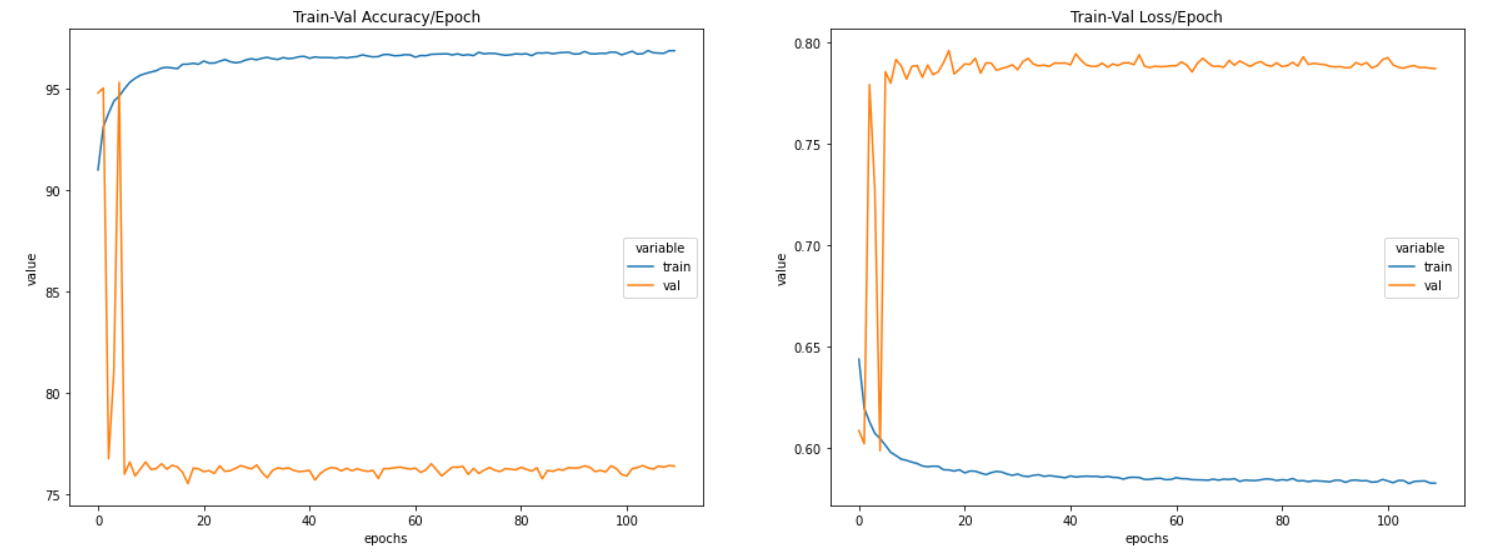

As clearly seen, overfitting has occurred.

In [ ]:
columns_to_drop = ["obj_ID", "alpha", "delta","run_ID","rerun_ID","cam_col","field_ID","spec_obj_ID","plate","MJD","fiber_ID","redshift"]
df = data.drop(columns=columns_to_drop)
df

,u,g,r,i,z,class
0,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY
1,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY
2,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY
3,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY
4,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY
...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,GALAXY
99996,22.69118,22.38628,20.45003,19.75759,19.41526,GALAXY
99997,21.16916,19.26997,18.20428,17.69034,17.35221,GALAXY
99998,25.35039,21.63757,19.91386,19.07254,18.62482,GALAXY


Our target values are in string format. We can convert them to numerical values like 0, 1, 2 instead of using one-hot encoding. This is more practical and avoids potential shape mismatches in the future.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["class"] = label_encoder.fit_transform(df["class"])
y=df["class"]
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: class, Length: 100000, dtype: int64

In [ ]:
x = df.iloc[:,:5]
x

,u,g,r,i,z
0,23.87882,22.27530,20.39501,19.16573,18.79371
1,24.77759,22.83188,22.58444,21.16812,21.61427
2,25.26307,22.66389,20.60976,19.34857,18.94827
3,22.13682,23.77656,21.61162,20.50454,19.25010
4,19.43718,17.58028,16.49747,15.97711,15.54461
...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569
99996,22.69118,22.38628,20.45003,19.75759,19.41526
99997,21.16916,19.26997,18.20428,17.69034,17.35221
99998,25.35039,21.63757,19.91386,19.07254,18.62482


In [ ]:
# First, our data is divided into train+val - test
X_trainval, X_test, y_trainval, y_test = train_test_split(x, y, test_size=0.2, random_state=70)

# "then, the train and validation data are also divided among themselves
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=30)

In [ ]:
#preparing the divided data for scaling.
#I used numpy to avoid various long and float errors in the future. Also it's faster
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
#preparing mini batches
class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train))
val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val))
test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test))

In [ ]:
EPOCHS = 200
BATCH_SIZE = 16
LEARNING_RATE = 0.0007
NUM_FEATURES = len(x.columns)
NUM_CLASSES = 3

In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [ ]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        self.relu = nn.ReLU()#I used dropout and batch normalization to reduce overfitting
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        x = nn.Softmax(dim=1)(x)
        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [ ]:
#This function will be used to calculate accuracy in train operation
def acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    correct = torch.eq(y_test, y_pred_tags).sum().item()
    acc = (correct / len(y_test)) * 100 
    return acc

In [ ]:
accuracy_stats = {
    'train': [],
    "val": []
}#I will use a dictionary to monitor loss and accurancy changes more easily.
loss_stats = {
    'train': [],
    "val": []
}

In [ ]:
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)

        optimizer.zero_grad()

        y_train_pred = model(X_train_batch)
       
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = acc(y_train_pred, y_train_batch)

        train_loss.backward()
        optimizer.step()

        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc

    with torch.no_grad():
        val_epoch_loss = 0
        val_epoch_acc = 0
        model.eval()

        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)

            y_val_pred = model(X_val_batch)

            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = acc(y_val_pred, y_val_batch)

            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc

    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))

    #print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')


Begin training.


  0%|          | 0/200 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

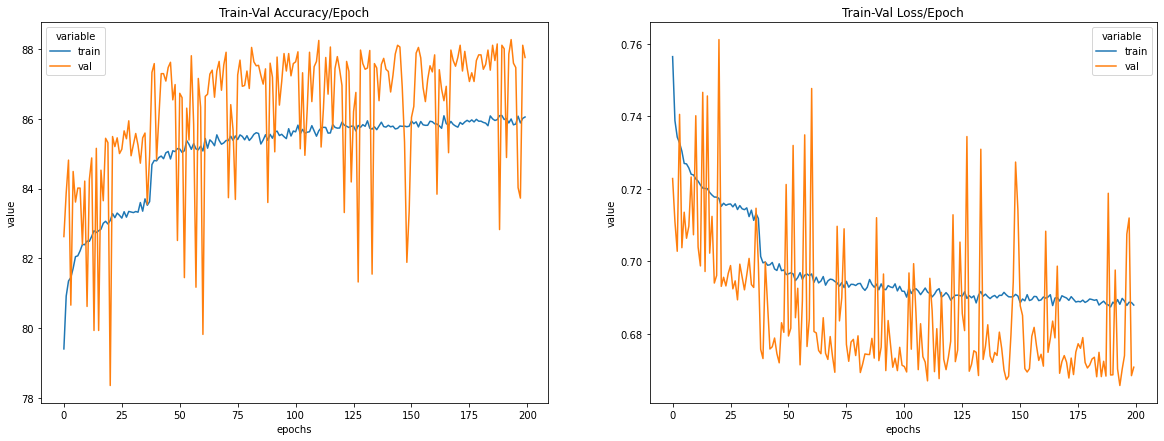

In [ ]:
# Plotting accuracy and loss for train and validation per epoch
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

In [ ]:
#testing
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())
y_pred_list = list(a.squeeze().tolist() for a in y_pred_list)


In [ ]:
print(accuracy_score(y_test, y_pred_list))

0.87595


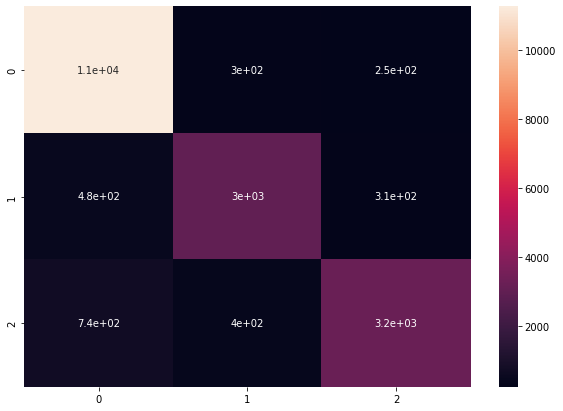

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred_list) , annot=True)

In [ ]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93     11828
           1       0.81      0.79      0.80      3806
           2       0.85      0.74      0.79      4366

    accuracy                           0.88     20000
   macro avg       0.86      0.83      0.84     20000
weighted avg       0.87      0.88      0.87     20000



After ignoring the epsilon column, our accuracy values gradually increased. Although both tables show fluctuations in the validation progress, the test accuracy reached a decent value of 87.5%. We can easily see the accuracy of our predictions on the confusion matrix. The concentrations on the matrix being diagonal shows that the model is efficient. As we can also confirm numerically from the classification report, while the accuracy of galaxy and star classifications are similar, the misclassification rate is highest for class no 2. 